### Heap Sort 的想法:

因為Heap Sort 相較 Merge Sort 來說，

我覺得比較陌生，所以我花了很多時間去看老師在投影片中的兩個影片在理解他。

影片資訊: https://www.youtube.com/watch?v=H5kAcmGOn4Q 、 https://youtu.be/MtQL_ll5KhQ

然後，我一樣先在紙上畫出來我的想法，並把一些條件寫下來。

### 寫在紙上的想法如下

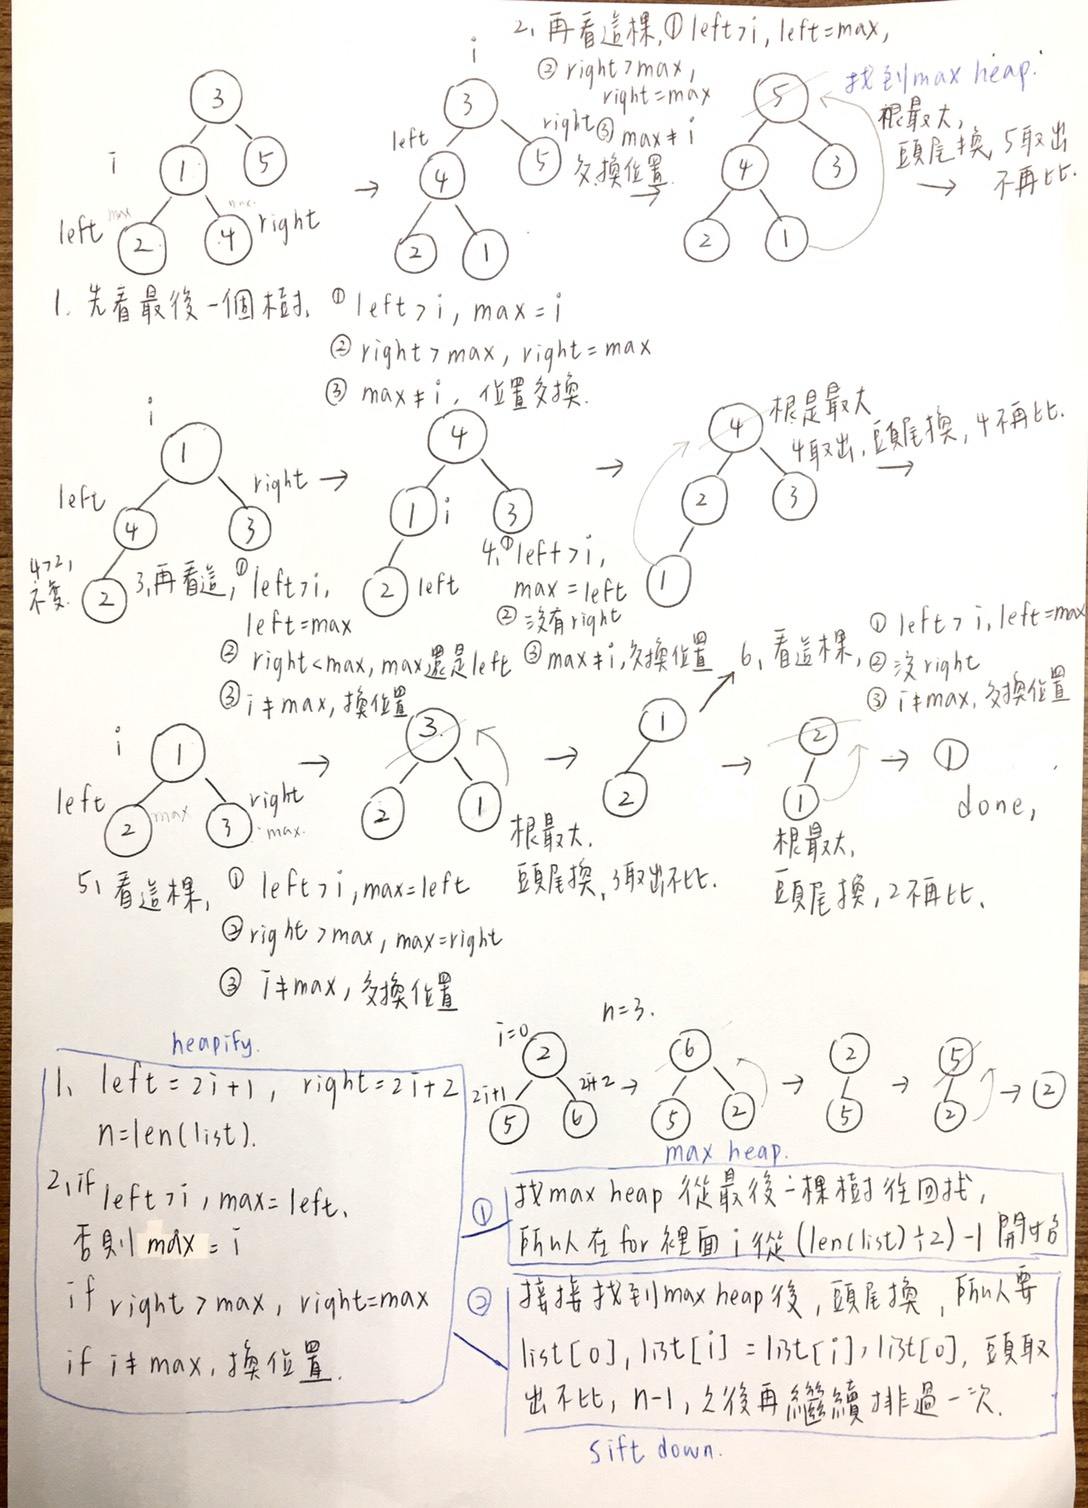

In [1]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/heap_sort_thinking.jpg")

### 我認為Heap Sort主要分成兩個部分:

1. 我們要在樹裡面先想辦法變成根最大的那棵樹，這個在影片中稱為max heap

2. 接著找到後，要在繼續進行排列等等動作，這個在影片中稱為sift down

而這兩個過程中都需要進行Heapify的動作，Heapify是在進行一小棵樹一小棵樹比較的一個過程。

### Step 1:

我先處理Heapify的部分，因為我覺得其他兩個Max Heap 和 Sift Down 是建立在Heapify之上。

我的想法是從一棵有三個元素的小樹開始，樹根的部分對應到List中i = 0，

而下面兩個左邊的對應到List裡面是i = 1，右邊的對應到List裡面是i = 2，

所有都是由左至右，由上往下填。

因此我將左邊那個元素令為Left = 2*i+1，而右邊的元素則稱為Right = 2*i+2。

同時我將樹的長度設定叫做 n。

接著進行小樹的比大小。

1. 當Left < n (符合樹構造)時，Left去和樹根的部分比大小，

   如果Left > i，那麼我們先暫時稱Left為max；如果Left < i 的話，那麼我們暫時稱i為max。
   
2. 當Right < n (符合樹的構造)時，我讓Right去和上一步比出來的max比大小，

   如果Right > i，那麼我們先暫時稱Right為max；否則的話max還是維持剛剛上一步的結果。
   
3. 這個時候，我們要確認我們一開始的i是不是我最後比較完的max，
   
   如果不是的話，那麼i和max的位置要互換，讓樹根成為最大的樹。

In [17]:
class Solution(object):
    
    def heapify(nums,i,n):
    
        
        left = 2*i + 1
        right = 2*i + 2
        
        if left < n and nums[left] > nums[i]:
            max = left
            
        else:
            max = i
            
    
        if right < n and nums[right] > nums[max]:
            max = right
            
            
        if max != i:
            nums[i],nums[max] = nums[max],nums[i]
            
           
        return nums

做個簡單的測試，看我的想法是不是可行的。

In [22]:
Solution.heapify([3,4,2],0,3)

[4, 3, 2]

### Result 1:

結果是可行的。

接下來我要運用這個Heapify去建構所謂的Max Heap。

### Step 2:

我的想法是，再整個Heap Sort中，

我要先建出一個影片中所謂的Max Heap，

這邊的樹要從最後一棵小樹慢慢往上比，

所以我將我的i設定成從最後一棵樹的樹根開始，因此這邊寫成(n/2)-1，

然後再運用recursive的功能呼叫之前打的Heapify進行比較。

In [53]:
class Solution(object):
    
    def heap_sort(self,nums):
        n = len(nums)
       
        for i in range((n//2)-1,-1,-1):
            Solution.heapify(nums,i,n)
        return nums
    
    def heapify(nums,i,n):
    
        
        left = 2*i + 1
        right = 2*i + 2
        
        if left < n and nums[left] > nums[i]:
            max = left
            
        else:
            max = i
            
    
        if right < n and nums[right] > nums[max]:
            max = right
            
            
        if max != i:
            nums[i],nums[max] = nums[max],nums[i]
            
           
        return nums

然後再做個測試，看我所想的運用Heapify去建構Max Heap是不是可行的。

(他應該要return[7,5,3,4,1,2])

In [54]:
Solution().heap_sort([3,4,2,5,1,7])

[7, 5, 3, 4, 1, 2]

### Result 2:

跑出來的結果是對的。

所以接下來我要做影片中所謂的Sift Down步驟。

### Step 3:

當Max Heap找到以後，樹根已經是最大的數後，

我要先將樹根和最後一個數對調，並且讓最大的數字(原本的樹根)不再進行排序比較，

而後接下來的樹(調換位置後，樹根變成最後一個數)就都會要進行所謂Sift Down動作。

這邊我一樣也是使用recursive的功能呼叫Heapify去做排序比較。

In [55]:
class Solution(object):
    
    def heap_sort(self,nums):
        
        n = len(nums)
        
        for i in range((n//2)-1,-1,-1):
            Solution.heapify(nums,i,n)
            
        for i in range(n,0,-1):
            nums[i],nums[0] = nums[0],nums[i]            
            
            Solution.heapify(nums,0,n)
          
        return nums
    
    def heapify(nums,i,n):
    
        
        left = 2*i + 1
        right = 2*i + 2
        
        if left < n and nums[left] > nums[i]:
            max = left
            
        else:
            max = i
            
    
        if right < n and nums[right] > nums[max]:
            max = right
            
            
        if max != i:
            nums[i],nums[max] = nums[max],nums[i]
            
           
        return nums

這邊一樣做一個測試，看我的heap sort是不是正確的。

(輸入[3,4,2,5,1,7]，應該要變成[1,2,3,4,5,7])

In [56]:
Solution().heap_sort([3,4,2,5,1,7])

IndexError: list index out of range

### Result 3:

結果發現出現錯誤，因此我上網查出現這個錯誤的原因是甚麼?

List index out of range的意思有兩個:

1. 這個List的index超出範圍

2. 這個List是空值

我想我的錯誤應該是屬於第一個，

所以我接下來要做一些修正。

參考資料: https://www.itread01.com/content/1540580196.html

### Step 4: 

我找到他的範圍，我發現我設定錯了，

因為n是指這個List的長度，而i比較像是次數或是index的概念，

所以他應該要n-1而不是n。

In [59]:
class Solution(object):
    
    def heap_sort(self,nums):
        
        n = len(nums)
        
        for i in range((n//2)-1,-1,-1):
            Solution.heapify(nums,i,n)
            
        for i in range(n-1,0,-1):
            nums[i],nums[0] = nums[0],nums[i]            
            n=n-1
            Solution.heapify(nums,0,n)
          
        return nums
    
    def heapify(nums,i,n):
    
        
        left = 2*i + 1
        right = 2*i + 2
        
        if left < n and nums[left] > nums[i]:
            max = left
            
        else:
            max = i
            
    
        if right < n and nums[right] > nums[max]:
            max = right
            
            
        if max != i:
            nums[i],nums[max] = nums[max],nums[i]
            
           
        return nums

再做一次測試，看看這樣修正後，是不是對的。

In [60]:
Solution().heap_sort([3,4,2,5,1,7])

[1, 2, 4, 3, 5, 7]

### Result 4:

結果發現雖然跑出來東西了，但其實裡面的排序還是錯的，

感覺他好像沒有完整的比完全部的數字，

所以我又要來抓錯了。

### Step 5: 

因為這邊一直抓不到錯，也不知道我到底要修正哪裡，

所以我去查了Heap Sort 的 pseudo code，

看看我的想法到底是哪裡出錯了?

我發現他在Heapify中最後一步交換位置時，

還有在使用recursive呼叫一次Heapify，

我想應該是因為每做一次sift down中的heapify動作就需要再做一次。

參考資料: https://www.algorithmist.com/index.php/Heap_sort

In [61]:
class Solution(object):
    
    def heap_sort(self,nums):
        
        n = len(nums)
        
        for i in range((n//2)-1,-1,-1):
            Solution.heapify(nums,i,n)
            
        for i in range(n-1,0,-1):
            nums[i],nums[0] = nums[0],nums[i]            
            n=n-1
            Solution.heapify(nums,0,n)
          
        return nums
    
    def heapify(nums,i,n):
    
        
        left = 2*i + 1
        right = 2*i + 2
        
        if left < n and nums[left] > nums[i]:
            max = left
            
        else:
            max = i
            
    
        if right < n and nums[right] > nums[max]:
            max = right
            

        if max != i:
            nums[i],nums[max] = nums[max],nums[i]
            Solution.heapify(nums,max,n)
           
        return nums

修改完再來做一次測試，看看我有沒有錯。

In [62]:
Solution().heap_sort([3,4,2,5,1,7])

[1, 2, 3, 4, 5, 7]

### Result 5: 

看著pscuedo code打完的結果是正確的!

### - - - - 完 成 Heap  Sort - - - - 

因為看完pscuedo code，

我發現我的那段程式碼以及heapify的部分跟pscuedo code都有點類似，

想說為了避免又被說是抄襲，

還是來重寫一下好了:)


### Step 6:

我的想法是，我將已經排序好的樹根取出，

並且用之前merge sort沒使用到的insert試試看，

將取出的樹根放進一個新的List，

同時，我讓最後一個位置的數直接取代樹根的位置(也就是原本的交換那邊)，

然後將最後一個位置用pop刪除掉，並且這棵樹的長度同時也跟著減一。

這樣最後return回來的新的List就是排序好大小的結果。

In [64]:
class Solution(object):
    
 
    def heap_sort(self,nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
 
        n = len(nums)
        new_list = []
       
    
        for i in range((n//2)-1,-1,-1):
            Solution.heapify(nums,i,n)
            
        for i in range(n,0,-1):
            
            new_list.insert(0,nums[0])
            nums[0]=nums[n-1]
            nums.pop()
            n=n-1
            Solution.heapify(nums,0,n)
        return new_list
            
    def heapify(nums,i,n):
    
        left = 2*i + 1
        right = 2*i + 2
        
        if left < n and nums[left] > nums[i]:
            max = left
            
        else:
            max = i
            
    
        if right < n and nums[right] > nums[max]:
            max = right
            
            
        if max != i:
            nums[i],nums[max] = nums[max],nums[i]
            
            
            Solution.heapify(nums,max,n)

一樣再做一個測試，看看結果是不是正確的。

In [66]:
Solution().heap_sort([1,3,6,7,2,10,9,5])

[1, 2, 3, 5, 6, 7, 9, 10]

### Result 6:

發現改成這樣一樣也是對的，

所以我的改寫成功。

接著要來想heapify的部分了。

### Step 7: 

後來我一直再想，heapify的部分到底還能怎麼改寫，

想超級久!後來我決定用樹的性質當作條件。

要形成一棵小樹，他的可能為:

1. left、right同時存在

2. left 存在而 right不存在

3. left、right都不存在

所以，我就用這個當作標準，繼續在每一個裡面加入條件。

當 left、right都存在時會有以下三個可能產生:

(1) 當right>left時:

    如果right同時也大於i的話，那麼我稱這個right為max，

    否則i = max。

(2) 當left>right時:

    如果left同時也大於i的話，那麼我稱這個left為max，

    否則i = max。


(3) 當left = right時:(我用left去做比較)
    
    如果left同時也大於i的話，那麼我稱這個left為max，

    否則i = max。
    
當 left存在而right不存在的話，只會有一種情況產生:

(1) 如果left大於i的話，那麼我稱這個left為max，

    否則i = max。
    
當 left 跟 right都不存在的話，我直接將i稱為max。

最後如果i跟max位置不同的話，在交換位置。

In [4]:
class Solution(object):
    
 
    def heap_sort(self,nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
 
        n = len(nums)
        new_list = []
       
    
        for i in range((n//2)-1,-1,-1):
            Solution.heapify(nums,i,n)
            
        for i in range(n,0,-1):
            
            new_list.insert(0,nums[0])
            nums[0]=nums[n-1]
            nums.pop()
            n=n-1
            Solution.heapify(nums,0,n)
        return new_list
            
    def heapify(nums,i,n):
    
        left = 2*i + 1
        right = 2*i + 2
        
        if left < n and right < n :
            if nums[right] > nums[left]:
                if nums[right] > nums[i]:
                    max = right
                else:
                    max = i
            elif nums[left] > nums[right]:
                if nums[left] > nums[i]:
                    max = left
                else:
                    max = i
            else:
                if nums[left] > nums[i]:
                    max = left
                else:
                    max = i
        
        elif left < n and right >= n:
            if nums[left] > nums[i]:
                max = left
            else:
                max = i
        
        else:
            max = i
            
            
        if max != i:
            nums[i],nums[max] = nums[max],nums[i]
            
            
            Solution.heapify(nums,max,n)

做個測試，看我的改寫是不是對的。

In [5]:
Solution().heap_sort([10,3,5,1,6,8,2,7,12])

[1, 2, 3, 5, 6, 7, 8, 10, 12]

### - - - - Heap Sort 完成 - - - - 

### 最後附上Heap Sort的流程圖

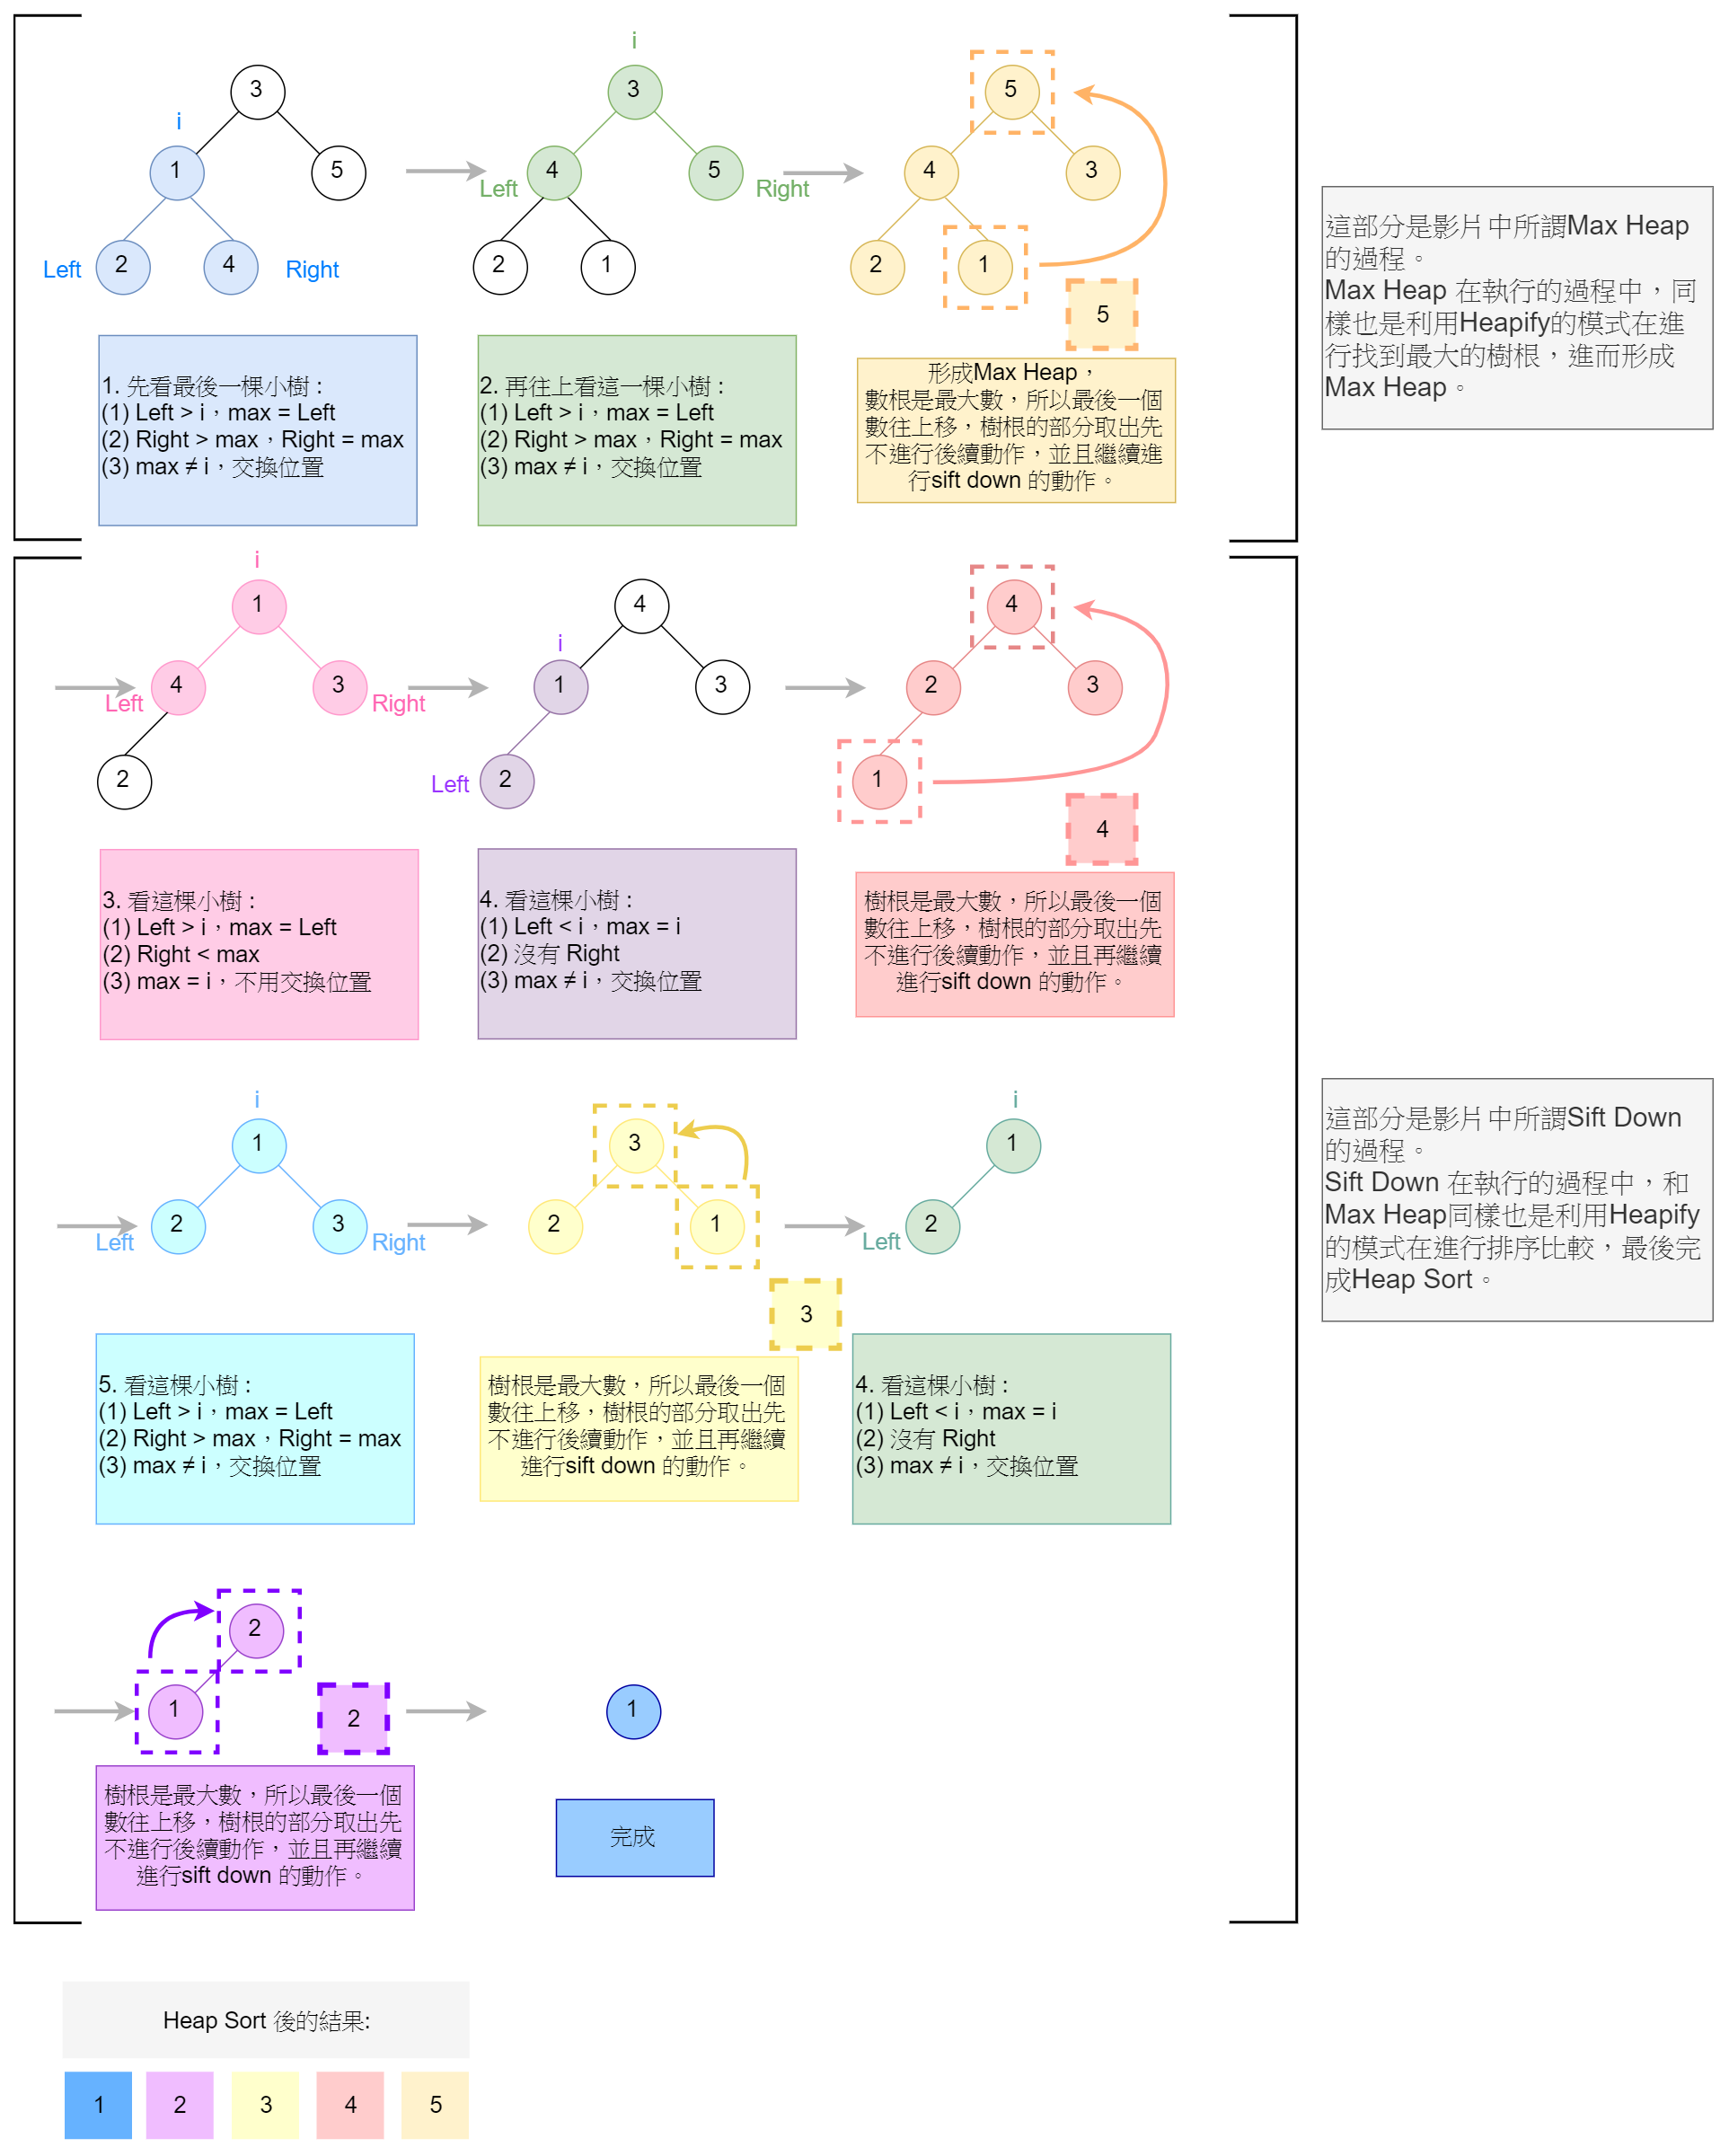

In [6]:
Image(filename="C:/Users/may50/Desktop/heap_sort.png")